In [8]:
import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [9]:
digits  = load_digits()

x = digits.data
y =  digits.target
print(x,y)
print(x.shape,y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]
(1797, 64) (1797,)


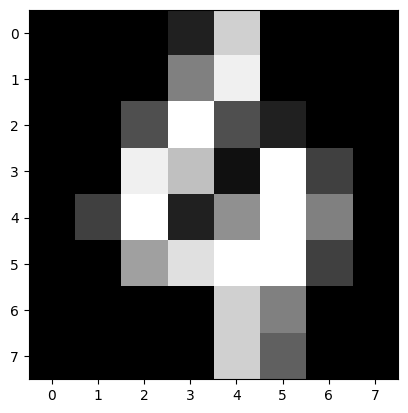

4


In [10]:
plt.gray()
plt.imshow(digits.images[100])
plt.show()
print(digits.target[100])

### Pre-Process Data

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x = x.reshape(-1,64)
x =  x/255
x = x.reshape([-1,8,8,1])
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x.shape, x_train.shape)
print(y[0], y_train.shape)

(1797, 8, 8, 1) (1437, 8, 8, 1)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (1437, 10)


### Define Model ( + MaxPooling + BatchNormalization)

In [12]:
model = keras.Sequential([])
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", strides=(1,1), input_shape=(8,8,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy, metrics=["accuracy"],)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,002 (300.79 KB)

 Trainable params: 76,938 (300.54 KB)

 Non-trainable params: 64 (256.00 B)

In [13]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4678 - loss: 1.9338 - val_accuracy: 0.5583 - val_loss: 2.1853
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9207 - loss: 0.5168 - val_accuracy: 0.6194 - val_loss: 2.0053
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9511 - loss: 0.2193 - val_accuracy: 0.7694 - val_loss: 1.8628
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9655 - loss: 0.1398 - val_accuracy: 0.7889 - val_loss: 1.6839
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9732 - loss: 0.0947 - val_accuracy: 0.8917 - val_loss: 1.4982
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9866 - loss: 0.0683 - val_accuracy: 0.9500 - val_loss: 1.2782
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9916 - loss: 0.0473 - val_accuracy: 0.9639 - val_loss: 1.0139
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9935 - loss: 0.0440 - val_accuracy: 0.9472 - val_loss

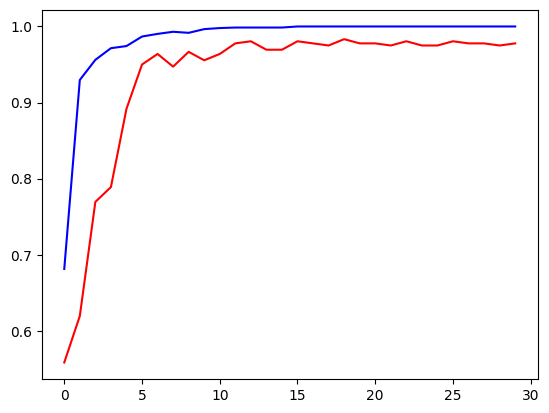

In [14]:
plt.plot(history.history["accuracy"], color="blue")
plt.plot(history.history["val_accuracy"], color="red")
